## Basic Tutorial for `pysal.network`

#### updated 07/2016

In [2]:
%pylab inline
import pysal as ps

Populating the interactive namespace from numpy and matplotlib


### Instantiate a network

In [3]:
ntw = ps.Network(ps.examples.get_path('streets.shp'))

### Snap point patterns to the network

In [4]:
# Crimes
ntw.snapobservations(ps.examples.get_path('crimes.shp'), 'crimes', attribute=True)
# Schools
ntw.snapobservations(ps.examples.get_path('schools.shp'), 'schools', attribute=False)

### A network is composed of a single topological representation of a road and $n$ point patterns which are snapped to the network.

In [5]:
ntw.pointpatterns

{'crimes': <pysal.network.network.PointPattern instance at 0x118767cb0>,
 'schools': <pysal.network.network.PointPattern instance at 0x118767c20>}

In [6]:
dir(ntw.pointpatterns['crimes'])

['__doc__',
 '__init__',
 '__module__',
 'dist_to_node',
 'npoints',
 'obs_to_edge',
 'obs_to_node',
 'points',
 'snapped_coordinates']

### Attributes for every point pattern

1. `dist_to_node` dict keyed by pointid with the value being a dict in the form 
        {node: distance to node, node: distance to node}
2. `obs_to_edge` dict keyed by edge with the value being a dict in the form 
        {pointID:(x-coord, y-coord), pointID:(x-coord, y-coord), ... }
3. `obs_to_node`
4. `points` geojson like representation of the point pattern.  Includes properties if read with attributes=True
5. `snapped_coordinates` dict keyed by pointid with the value being (x-coord, y-coord)

### Counts per edge are important, but should not be precomputed since we have different representations of the network (digitized and graph currently).  (Relatively) Uniform segmentation still needs to be done.

In [7]:
counts = ntw.count_per_edge(ntw.pointpatterns['crimes'].obs_to_edge,
                            graph=False)
sum(counts.values()) / float(len(counts.keys()))

2.6822429906542058

### Segmentation

In [8]:
n200 = ntw.segment_edges(200.0)

In [9]:
counts = n200.count_per_edge(n200.pointpatterns['crimes'].obs_to_edge, graph=False)
sum(counts.values()) / float(len(counts.keys()))

2.0354609929078014

### Visualization of the shapefile derived, unsegmented network with nodes in a larger, semi-opaque form and the distance segmented network with small, fully opaque nodes.

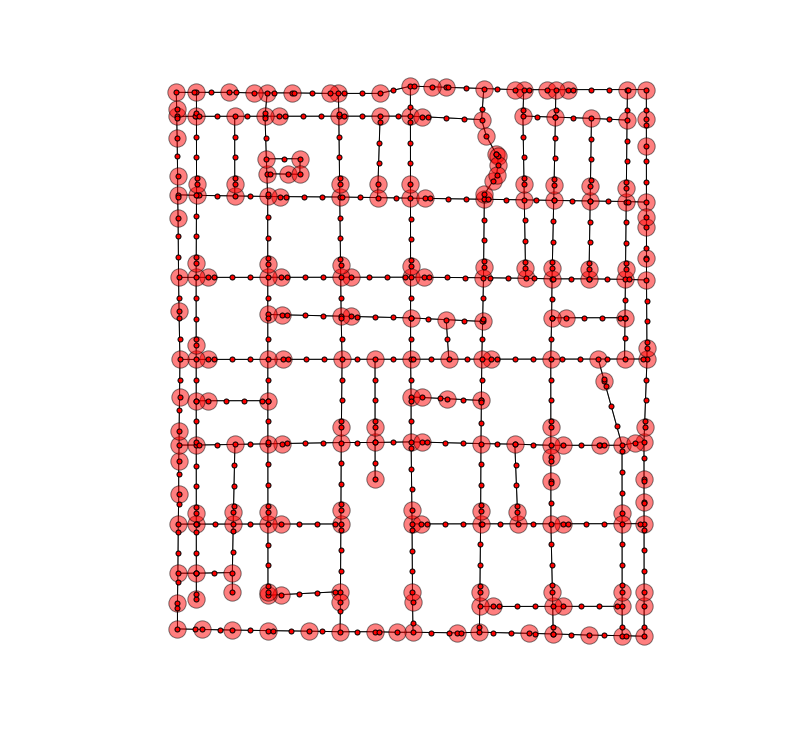

In [10]:
import networkx as nx
figsize(10,10)

g = nx.Graph()
for e in ntw.edges:
    g.add_edge(*e)
for n, p in ntw.node_coords.iteritems():
    g.node[n] = p
nx.draw(g, ntw.node_coords, node_size=300, alpha=0.5)

g = nx.Graph()
for e in n200.edges:
    g.add_edge(*e)
for n, p in n200.node_coords.iteritems():
    g.node[n] = p
nx.draw(g, n200.node_coords, node_size=25, alpha=1.0)

### Moran's I using the digitized network

In [11]:
# Binary Adjacency
#ntw.contiguityweights(graph=False)
w = ntw.contiguityweights(graph=False)

# Build the y vector
#edges = ntw.w.neighbors.keys()
edges = w.neighbors.keys()
y = np.zeros(len(edges))
for i, e in enumerate(edges):
    if e in counts.keys():
        y[i] = counts[e]

# Moran's I
#res = ps.esda.moran.Moran(y, ntw.w, permutations=99)
res = ps.esda.moran.Moran(y, w, permutations=99)
print dir(res)

['EI', 'EI_sim', 'I', 'VI_norm', 'VI_rand', 'VI_sim', '_Moran__calc', '_Moran__moments', '__doc__', '__init__', '__module__', 'n', 'p_norm', 'p_rand', 'p_sim', 'p_z_sim', 'permutations', 'seI_norm', 'seI_rand', 'seI_sim', 'sim', 'w', 'y', 'z', 'z2ss', 'z_norm', 'z_rand', 'z_sim']


### Moran's I using the graph representation to generate the W

* Note that we have to regenerate the counts per edge, since the graph will have less edges.

In [12]:
counts = ntw.count_per_edge(ntw.pointpatterns['crimes'].obs_to_edge, graph=True)

# Binary Adjacency
#ntw.contiguityweights(graph=True)
w = ntw.contiguityweights(graph=True)

# Build the y vector
#edges = ntw.w.neighbors.keys()
edges = w.neighbors.keys()
y = np.zeros(len(edges))
for i, e in enumerate(edges):
    if e in counts.keys():
        y[i] = counts[e]

# Moran's I
#res = ps.esda.moran.Moran(y, ntw.w, permutations=99)
res = ps.esda.moran.Moran(y, w, permutations=99)


print dir(res)

['EI', 'EI_sim', 'I', 'VI_norm', 'VI_rand', 'VI_sim', '_Moran__calc', '_Moran__moments', '__doc__', '__init__', '__module__', 'n', 'p_norm', 'p_rand', 'p_sim', 'p_z_sim', 'permutations', 'seI_norm', 'seI_rand', 'seI_sim', 'sim', 'w', 'y', 'z', 'z2ss', 'z_norm', 'z_rand', 'z_sim']


### Moran's I using the segmented network and intensities instead of counts

In [13]:
# Binary Adjacency
#n200.contiguityweights(graph=False)
w = n200.contiguityweights(graph=False)

# Compute the counts
counts = n200.count_per_edge(n200.pointpatterns['crimes'].obs_to_edge, graph=False)

# Build the y vector and convert from raw counts to intensities
#edges = n200.w.neighbors.keys()
edges = w.neighbors.keys()
y = np.zeros(len(edges))
for i, e in enumerate(edges):
    if e in counts.keys():
        length = n200.edge_lengths[e]
        y[i] = counts[e] / length

# Moran's I
#res = ps.esda.moran.Moran(y, n200.w, permutations=99)
res = ps.esda.moran.Moran(y, w, permutations=99)

print dir(res)

['EI', 'EI_sim', 'I', 'VI_norm', 'VI_rand', 'VI_sim', '_Moran__calc', '_Moran__moments', '__doc__', '__init__', '__module__', 'n', 'p_norm', 'p_rand', 'p_sim', 'p_z_sim', 'permutations', 'seI_norm', 'seI_rand', 'seI_sim', 'sim', 'w', 'y', 'z', 'z2ss', 'z_norm', 'z_rand', 'z_sim']


### Timings for distance based methods, e.g. G-function

In [14]:
import time
t1 = time.time()
n0 = ntw.allneighbordistances(ntw.pointpatterns['crimes'])
print time.time()-t1

0.734544992447


In [15]:
import time
t1 = time.time()
n1 = n200.allneighbordistances(n200.pointpatterns['crimes'])
print time.time()-t1

4.1571199894


* Note that the first time these methods are called, the underlying node-to-node shortest path distance matrix has to be calculated. Subsequent calls will not require this, and will be much faster:

In [16]:
import time
t1 = time.time()
n0 = ntw.allneighbordistances(ntw.pointpatterns['crimes'])
print time.time()-t1

0.14933681488


In [17]:
import time
t1 = time.time()
n1 = n200.allneighbordistances(n200.pointpatterns['crimes'])
print time.time()-t1

0.159301042557


### Simulate a point pattern on the network

* Need to supply a count of the number of points and a distirbution (default is uniform).  Generally, this will not be called by the user, since the simulation will be used for Monte Carlo permutation.

In [18]:
npts = ntw.pointpatterns['crimes'].npoints
sim = ntw.simulate_observations(npts)
sim

<pysal.network.network.SimulatedPointPattern instance at 0x11bd21cb0>

### Create a nearest neighbor matrix using the crimes point pattern

* Right now, both the G and K functions generate a full distance matrix.  This is because, I know that the full generation is correct and I believe that the truncated generated, e.g. nearest neighbor, has a big.

### G-function

In [19]:
gres = ps.NetworkG(ntw,
                   ntw.pointpatterns['crimes'],
                   permutations = 99)

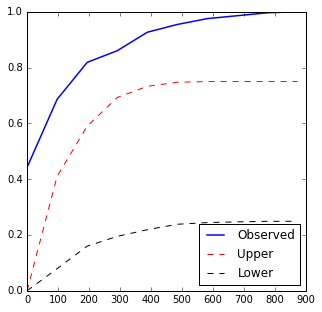

In [20]:
figsize(5,5)
plot(gres.xaxis, gres.observed, 'b-', linewidth=1.5, label='Observed')
plot(gres.xaxis, gres.upperenvelope, 'r--', label='Upper')
plot(gres.xaxis, gres.lowerenvelope, 'k--', label='Lower')
legend(loc='best')

### K-function

In [21]:
kres = ps.NetworkK(ntw,
                   ntw.pointpatterns['crimes'],
                   permutations=99)

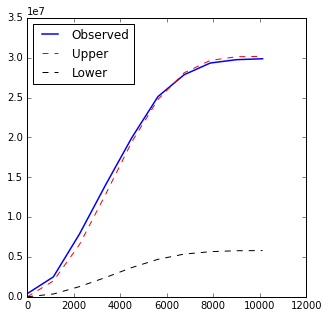

In [22]:
figsize(5,5)
plot(kres.xaxis, kres.observed, 'b-', linewidth=1.5, label='Observed')
plot(kres.xaxis, kres.upperenvelope, 'r--', label='Upper')
plot(kres.xaxis, kres.lowerenvelope, 'k--', label='Lower')
legend(loc='best')

-----------